In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
data = pd.read_csv('/content/fraudTrain.csv')
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (31151, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31151 entries, 0 to 31150
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             31151 non-null  int64  
 1   trans_date_trans_time  31151 non-null  object 
 2   cc_num                 31151 non-null  int64  
 3   merchant               31151 non-null  object 
 4   category               31151 non-null  object 
 5   amt                    31151 non-null  float64
 6   first                  31151 non-null  object 
 7   last                   31151 non-null  object 
 8   gender                 31151 non-null  object 
 9   street                 31151 non-null  object 
 10  city                   31150 non-null  object 
 11  state                  31150 non-null  object 
 12  zip                    31150 non-null  float64
 13  lat                    31150 non-null  float64
 14  long                   31150 non-null  float64
 15  ci

In [ ]:
data.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


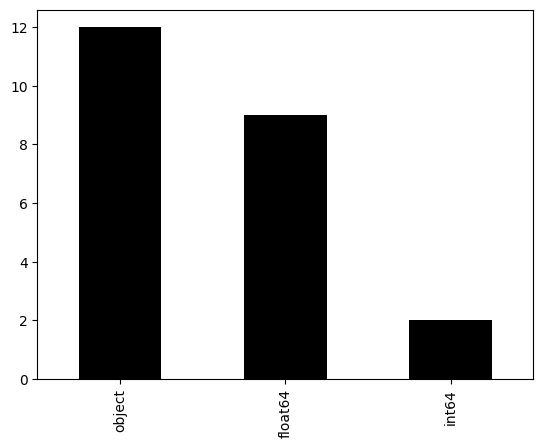

In [ ]:
data.dtypes.value_counts().plot(kind='bar', color ="black");

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,31151.0,1.557500e+04,8.992663e+03,0.000000e+00,7.787500e+03,1.557500e+04,2.336250e+04,3.115000e+04
cc_num,31151.0,4.160516e+17,1.307937e+18,6.041621e+10,1.800429e+14,3.519233e+15,4.642255e+15,4.992346e+18
amt,31151.0,7.197222e+01,1.483820e+02,1.000000e+00,9.710000e+00,4.809000e+01,8.387000e+01,1.187221e+04
zip,31150.0,4.874101e+04,2.699693e+04,1.257000e+03,2.552600e+04,4.808800e+04,7.204200e+04,9.978300e+04
lat,31150.0,3.853620e+01,5.096907e+00,2.002710e+01,3.466890e+01,3.934260e+01,4.184670e+01,6.568990e+01
long,31150.0,-9.024525e+01,1.392054e+01,-1.656723e+02,-9.680940e+01,-8.746160e+01,-8.012840e+01,-6.795030e+01
city_pop,31150.0,8.905872e+04,2.976224e+05,2.300000e+01,7.440000e+02,2.471000e+03,2.047800e+04,2.906700e+06
unix_time,31150.0,1.326173e+09,4.540190e+05,1.325376e+09,1.325814e+09,1.326153e+09,1.326564e+09,1.326991e+09
merch_lat,31150.0,3.853657e+01,5.126436e+00,1.904014e+01,3.478156e+01,3.934515e+01,4.191981e+01,6.665924e+01
merch_long,31150.0,-9.024764e+01,1.393795e+01,-1.666299e+02,-9.697243e+01,-8.742456e+01,-8.016795e+01,-6.696774e+01


**`Data preprocessing`**
**Data cleaning_removing the duplicate values from the dataset**

In [ ]:
data.drop_duplicates()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31146,31146,2019-01-19 16:32:18,373905417449658,"fraud_Lesch, D'Amore and Brown",food_dining,166.48,Sarah,Bishop,F,554 Mcdonald Valley Apt. 539,...,31.9290,-97.6443,2526.0,Phytotherapist,1970-11-12,b11956373cff82dc89c95b436cbf5ac6,1.326991e+09,32.616988,-97.509247,0.0
31147,31147,2019-01-19 16:33:30,4979422371139333,"fraud_Torp, Muller and Borer",health_fitness,1.15,Kelly,Zimmerman,F,1893 Katie Tunnel,...,41.4193,-99.3844,73.0,Product designer,1935-02-10,3cbb9b00056db701b0cc69ba7c0ebbce,1.326991e+09,40.534852,-98.720506,0.0
31148,31148,2019-01-19 16:33:50,349612764943496,fraud_Jacobi Inc,health_fitness,72.92,Xavier,Beltran,M,61107 Edwards Dam Apt. 463,...,37.1046,-83.5706,467.0,"Psychologist, forensic",1984-06-04,18a4b54a9d377751eb069e92682c4c54,1.326991e+09,37.505811,-82.874039,0.0
31149,31149,2019-01-19 16:34:54,213156747557083,fraud_Reichel LLC,personal_care,3.04,Adam,Santos,M,725 Jo Trace Apt. 102,...,34.1556,-118.2322,172817.0,Advertising account planner,1982-07-30,1a5390332bc3fb6af45c563e41a2a968,1.326991e+09,34.399891,-118.092352,0.0


cheking the dupicate after removing the duplicates

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.dropna()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31145,31145,2019-01-19 16:30:45,2235613922823698,fraud_O'Hara-Wilderman,food_dining,16.59,Melissa,Mcclure,F,2027 Snyder Track,...,42.7300,-104.7024,241.0,Educational psychologist,1980-12-16,446ac7f2d94308e863fa868bc5747bdc,1.326991e+09,42.881643,-104.090314,0.0
31146,31146,2019-01-19 16:32:18,373905417449658,"fraud_Lesch, D'Amore and Brown",food_dining,166.48,Sarah,Bishop,F,554 Mcdonald Valley Apt. 539,...,31.9290,-97.6443,2526.0,Phytotherapist,1970-11-12,b11956373cff82dc89c95b436cbf5ac6,1.326991e+09,32.616988,-97.509247,0.0
31147,31147,2019-01-19 16:33:30,4979422371139333,"fraud_Torp, Muller and Borer",health_fitness,1.15,Kelly,Zimmerman,F,1893 Katie Tunnel,...,41.4193,-99.3844,73.0,Product designer,1935-02-10,3cbb9b00056db701b0cc69ba7c0ebbce,1.326991e+09,40.534852,-98.720506,0.0
31148,31148,2019-01-19 16:33:50,349612764943496,fraud_Jacobi Inc,health_fitness,72.92,Xavier,Beltran,M,61107 Edwards Dam Apt. 463,...,37.1046,-83.5706,467.0,"Psychologist, forensic",1984-06-04,18a4b54a9d377751eb069e92682c4c54,1.326991e+09,37.505811,-82.874039,0.0


In [ ]:
data.isnull()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31146,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31149,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
data.nunique()

,0
Unnamed: 0,31151
trans_date_trans_time,30794
cc_num,909
merchant,693
category,14
amt,13176
first,337
last,465
gender,2
street,909


In [ ]:
data=data.drop(columns=['Unnamed: 0','first','last','state','city_pop','job','dob'])

In [ ]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,zip,lat,long,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,28654.0,36.0788,-81.1781,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,99160.0,48.8878,-118.2105,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,83252.0,42.1808,-112.2620,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,59632.0,46.2306,-112.1138,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,24433.0,38.4207,-79.4629,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
data.nunique()

,0
trans_date_trans_time,30794
cc_num,909
merchant,693
category,14
amt,13176
gender,2
street,909
city,836
zip,898
lat,896


Feature Extraction and data transformation




In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
data['merchant'] = encoder.fit_transform(data['merchant'])
data['category'] = encoder.fit_transform(data['category'])
data['street'] = encoder.fit_transform(data['street'])
data['trans_num'] = encoder.fit_transform(data['trans_num'])
data['city'] = encoder.fit_transform(data['city'])
data['gender'] = encoder.fit_transform(data['gender'])
data['trans_date_trans_time'] = encoder.fit_transform(data['trans_date_trans_time'])  # corrected


In [ ]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,zip,lat,long,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,514,8,4.97,0,527,493,28654.0,36.0788,-81.1781,1395,1.325376e+09,36.011293,-82.048315,0.0
1,1,630423337322,241,4,107.23,0,408,568,99160.0,48.8878,-118.2105,3852,1.325376e+09,49.159047,-118.186462,0.0
2,2,38859492057661,390,0,220.11,1,560,439,83252.0,42.1808,-112.2620,19691,1.325376e+09,43.150704,-112.154481,0.0
3,3,3534093764340240,360,2,45.00,1,860,81,59632.0,46.2306,-112.1138,13106,1.325376e+09,47.034331,-112.561071,0.0
4,4,375534208663984,297,9,41.96,1,393,203,24433.0,38.4207,-79.4629,20000,1.325376e+09,38.674999,-78.632459,0.0


data training and preprocessing without sampling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data =train_test_split(data,test_size=0.3)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21805 entries, 18833 to 10189
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  21805 non-null  int64  
 1   cc_num                 21805 non-null  int64  
 2   merchant               21805 non-null  int64  
 3   category               21805 non-null  int64  
 4   amt                    21805 non-null  float64
 5   gender                 21805 non-null  int64  
 6   street                 21805 non-null  int64  
 7   city                   21805 non-null  int64  
 8   zip                    21805 non-null  float64
 9   lat                    21805 non-null  float64
 10  long                   21805 non-null  float64
 11  trans_num              21805 non-null  int64  
 12  unix_time              21805 non-null  float64
 13  merch_lat              21805 non-null  float64
 14  merch_long             21805 non-null  float64
 15  is_

In [ ]:
X = data.drop('is_fraud', axis=1)  # all columns except the label
y = data['is_fraud']               # the label column


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((24920, 15), (24920,), (6231, 15), (6231,))

Data modeling
First we perfrom training of the model using random forest classifier method without sampling to analyse the result

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF =RandomForestClassifier(random_state=42) #train the model based on the training dataset using random forest

In [ ]:
# Drop rows where the label is NaN
data = data.dropna(subset=['is_fraud'])  # Replace 'is_fraud' with your actual target column name

# Then proceed to define X and y
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Split into train/test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(data['is_fraud'].isna().sum())


0


In [ ]:
RF.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pred_RF =RF.predict(x_test)

EValuation Metrixs _without sampling

In [ ]:
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    classification_report
)


In [ ]:
# accuracy

accRF=accuracy_score(y_test,pred_RF)
accRF

0.996147672552167

In [ ]:
#Precisin Score
preRF=precision_score(y_test,pred_RF)
preRF

0.9534883720930233

In [ ]:
#recall Value
recall_RF =recall_score(y_test,pred_RF)
recall_RF

0.6507936507936508

In [ ]:
# AUC_ROC curve

auc_roc_RF = roc_auc_score(y_test,pred_RF)
auc_roc_RF

np.float64(0.8252346719997117)

In [ ]:
# Confussin matrics
conf_matrix_RF= confusion_matrix(y_test,pred_RF)
conf_matrix_RF

array([[6165,    2],
       [  22,   41]])

Random Forest confusion matrix without sampling


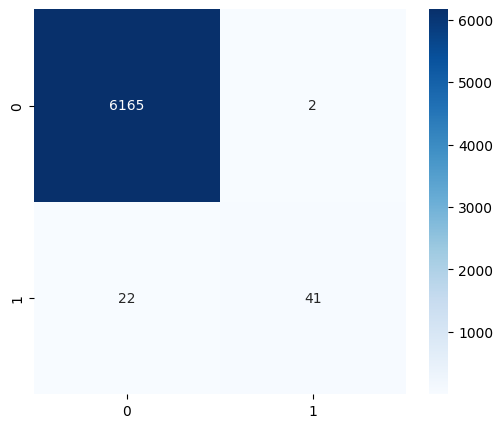

In [ ]:
print('Random Forest confusion matrix without sampling')
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix_RF, annot=True, ax=ax, cmap='Blues', fmt='d')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_RF))
print(f'Random Forest Classifier Confussion matrix without sampleing')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6167
         1.0       0.95      0.65      0.77        63

    accuracy                           1.00      6230
   macro avg       0.97      0.83      0.89      6230
weighted avg       1.00      1.00      1.00      6230

Random Forest Classifier Confussion matrix without sampleing


AUC-ROC Curve - Without Sampling


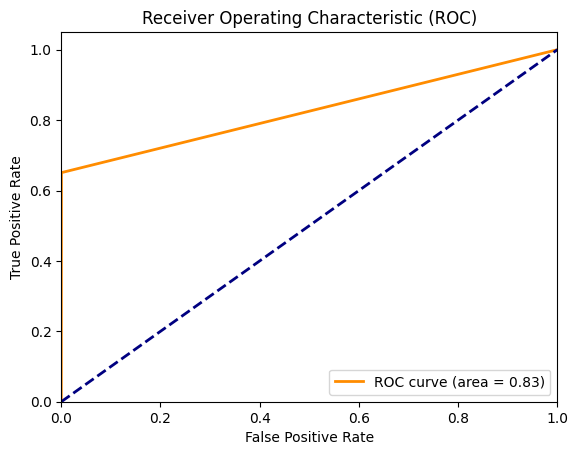

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true = y_test
y_scores = pred_RF  # Make sure this is your predicted probabilities, not class labels

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

print('AUC-ROC Curve - Without Sampling')
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter


In [ ]:
scaler =StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale =scaler.transform(x_test)

In [ ]:
somte =SMOTE(random_state=42)
x_train_resample,y_train_resample =somte.fit_resample(x_train_scale,y_train)

In [ ]:
print("Resampled class distribution:",Counter(y_train_resample))


Resampled class distribution: Counter({0.0: 24674, 1.0: 24674})


Data model after smooth

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF1=RandomForestClassifier(random_state=42)

In [ ]:
RF1.fit(x_train_resample,y_train_resample)

RandomForestClassifier(random_state=42)

In [ ]:
pred_RF1=RF1.predict(x_test_scale)

Evaluation matric after smooth

In [ ]:
# 1.accuracy
accRF=accuracy_score(y_test,pred_RF)
accRF

0.996147672552167

In [ ]:
#2.Precison Score
precRF1=precision_score(y_test,pred_RF)
precRF1

0.9534883720930233

In [ ]:
# 3.Recall
recall_RF1 =recall_score(y_test,pred_RF)
recall_RF1

0.6507936507936508

In [ ]:
# Auc Roc curve
auc_roc_RF1=roc_auc_score(y_test,pred_RF1)
auc_roc_RF1

np.float64(0.9118876457128443)

In [ ]:
# confusion matrix

conf_matrix_RF1 =confusion_matrix(y_test,pred_RF1)
conf_matrix_RF1

array([[6157,   10],
       [  11,   52]])

Random forest Confusion matrix using SMOTE Sampling


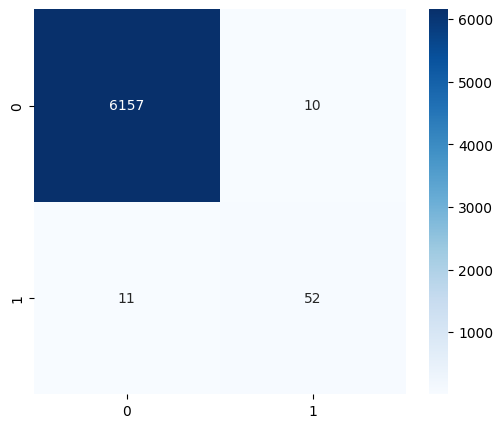

In [ ]:
print('Random forest Confusion matrix using SMOTE Sampling')
fig, axes = plt.subplots(figsize=(6, 5))
sns.heatmap(conf_matrix_RF1, annot=True, ax=axes, cmap='Blues', fmt='d')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_RF1))
print(f'Random Forest Classifier Confussion matrix usinf smote smaplicing')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6167
         1.0       0.84      0.83      0.83        63

    accuracy                           1.00      6230
   macro avg       0.92      0.91      0.92      6230
weighted avg       1.00      1.00      1.00      6230

Random Forest Classifier Confussion matrix usinf smote smaplicing


AUC-ROC Curve - Without Sampling


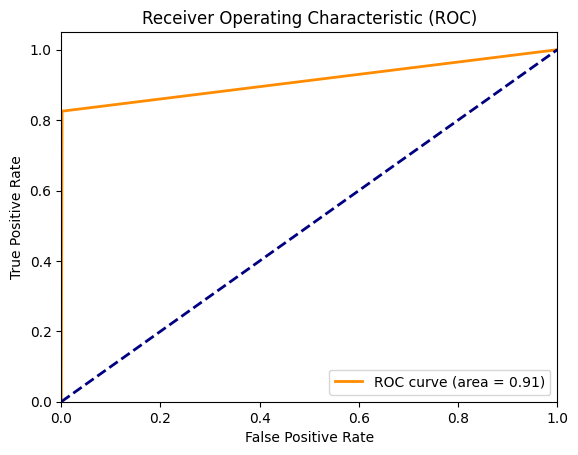

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true = y_test
y_scores = pred_RF1  # Make sure this is your predicted probabilities, not class labels

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

print('AUC-ROC Curve - Without Sampling')
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
